In [1]:
import numpy as np
import scipy.io as sio
from scipy.spatial import distance
import matplotlib.pyplot as plt

In [2]:
mat_contents = sio.loadmat('hw1/mnistData.mat')

Dataset shape: (28, 28, 10000)  
Label shape: (10000, 1)

In [10]:
n = 1000

# Each training case is flattened to a row
X_train = np.reshape(mat_contents['mnist']['train_images'][0,0][:,:,0:n], (28*28,n))
X_train = np.swapaxes(X_train, 1, 0) # each row is a training case
X_test = np.reshape(mat_contents['mnist']['test_images'][0,0][:,:,0:n], (28*28,n))
X_test = np.swapaxes(X_test, 1, 0) # each row is a test case

Y_train = np.reshape(mat_contents['mnist']['train_labels'][0,0][0:n], (n,))
Y_test = np.reshape(mat_contents['mnist']['test_labels'][0,0][0:n], (n,))

In [4]:
def mnist_image(pixels, label):
    pixels = pixels.reshape((28, 28))
    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray')
    plt.show()

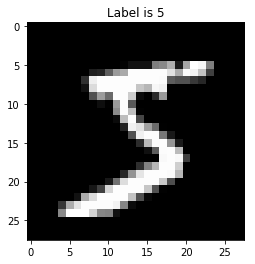

In [5]:
mnist_image(X_train[0], Y_train[0])

In [8]:
pred = np.zeros_like(Y_train)

for index, row in enumerate(X_test):
    distances=[]
    for neighbor in X_train:
        distances.append(distance.sqeuclidean(row, neighbor))
    min_dist = np.argmin(distances)
    pred[index] = Y_train[min_dist]

In [9]:
np.mean(np.not_equal(pred, Y_test))

0.17199999999999999